In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.signal import find_peaks


In [2]:
# List of years to read the files from
years = list(range(2016, 2024))

dataframes = []  # List to store each year's dataframe

for year in years:
    file_path = f'./data/dsc_fc_summed_spectra_{year}_v01.csv'
    data1 = pd.read_csv(file_path, header=None)
    dataframes.append(data1)
    #print(f"Data for {year}:\n", data1.head(), "\n")

# Concatenate all dataframes into a single dataframe
data = pd.concat(dataframes, ignore_index=True)

print("First 5 rows:\n", data.head())
print("\nLast 5 rows:\n", data.tail())

First 5 rows:
                     0        1        2        3    4    5    6    7    8   \
0  2016-01-01 00:00:00  6.83609 -3.37934 -12.9205  0.0  0.0  0.0  0.0  0.0   
1  2016-01-01 00:01:00  6.76732 -3.30194 -12.9967  0.0  0.0  0.0  0.0  0.0   
2  2016-01-01 00:02:00  6.39107 -2.61173 -13.3271  0.0  0.0  0.0  0.0  0.0   
3  2016-01-01 00:03:00  6.44897 -2.61525 -13.3299  0.0  0.0  0.0  0.0  0.0   
4  2016-01-01 00:04:00  6.58758 -2.73082 -13.2361  0.0  0.0  0.0  0.0  0.0   

    9   ...   44   45   46   47   48   49   50   51   52   53  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 54 columns]

Last 5 rows:
                           0        1        2         3         4         5   \
3277435  2023-

In [3]:
plt.style.use('default')

In [4]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
count,3.259998e+06,3.259998e+06,3.259998e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,...,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06,3.277440e+06
mean,8.015442e-02,-1.255092e-01,2.171055e-02,3.201943e+01,1.161180e+01,4.864001e+01,5.174630e+01,7.312036e+01,7.670371e+01,1.093396e+02,...,2.246104e+01,1.420198e+01,1.254695e+01,8.163200e+00,6.576959e+00,4.196891e+00,3.816626e+00,3.062619e+00,3.362869e+00,2.718429e+00
std,3.410268e+00,3.765791e+00,2.982616e+00,5.610893e+01,3.642289e+01,7.294865e+01,7.868658e+01,1.005660e+02,1.155415e+02,1.449562e+02,...,9.461018e+01,7.068892e+01,7.067024e+01,5.656559e+01,4.901286e+01,4.033789e+01,3.864041e+01,3.373489e+01,3.760109e+01,3.188347e+01
min,-2.014280e+01,-3.178510e+01,-3.332440e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-2.532720e+00,-2.640140e+00,-1.522248e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.694915e-01,-2.131885e-01,3.084400e-02,0.000000e+00,0.000000e+00,5.209380e-01,4.133850e+00,3.198735e+01,3.239425e+01,6.205510e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.672278e+00,2.395460e+00,1.553040e+00,5.360380e+01,7.292547e+00,8.902572e+01,9.003172e+01,1.210270e+02,1.185880e+02,1.657952e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.304940e+01,2.789380e+01,3.483770e+01,1.675760e+03,1.582720e+03,1.736050e+03,1.496590e+03,1.699290e+03,1.848460e+03,2.270620e+03,...,1.756870e+03,1.757440e+03,1.775960e+03,1.762550e+03,1.689330e+03,1.719110e+03,1.939020e+03,1.852740e+03,1.875050e+03,1.866960e+03


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277440 entries, 0 to 3277439
Data columns (total 54 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64
 40  

In [6]:
data[0]= pd.to_datetime(data[0])
data.replace(0, np.nan, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277440 entries, 0 to 3277439
Data columns (total 54 columns):
 #   Column  Dtype         
---  ------  -----         
 0   0       datetime64[ns]
 1   1       float64       
 2   2       float64       
 3   3       float64       
 4   4       float64       
 5   5       float64       
 6   6       float64       
 7   7       float64       
 8   8       float64       
 9   9       float64       
 10  10      float64       
 11  11      float64       
 12  12      float64       
 13  13      float64       
 14  14      float64       
 15  15      float64       
 16  16      float64       
 17  17      float64       
 18  18      float64       
 19  19      float64       
 20  20      float64       
 21  21      float64       
 22  22      float64       
 23  23      float64       
 24  24      float64       
 25  25      float64       
 26  26      float64       
 27  27      float64       
 28  28      float64       
 29  29      float6

In [8]:
Bx = data.iloc[:, 1]
By = data.iloc[:, 2]
Bz = data.iloc[:, 3]
data['magnitude'] = ((Bx ** 2) + (By ** 2) + (Bz ** 2))**0.5

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,magnitude
0,2016-01-01 00:00:00,6.83609,-3.37934,-12.9205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.003046
1,2016-01-01 00:01:00,6.76732,-3.30194,-12.9967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.020441
2,2016-01-01 00:02:00,6.39107,-2.61173,-13.3271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.009281
3,2016-01-01 00:03:00,6.44897,-2.61525,-13.3299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.037120
4,2016-01-01 00:04:00,6.58758,-2.73082,-13.2361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.034890


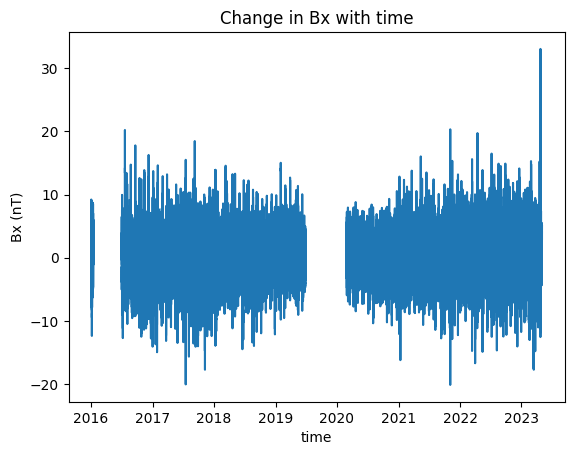

In [10]:
# Figure of Bx with time
date = data.iloc[:, 0]
plt.title('Change in Bx with time')
plt.xlabel('time')
plt.ylabel('Bx (nT)')
plt.plot(date, Bx)
plt.show()

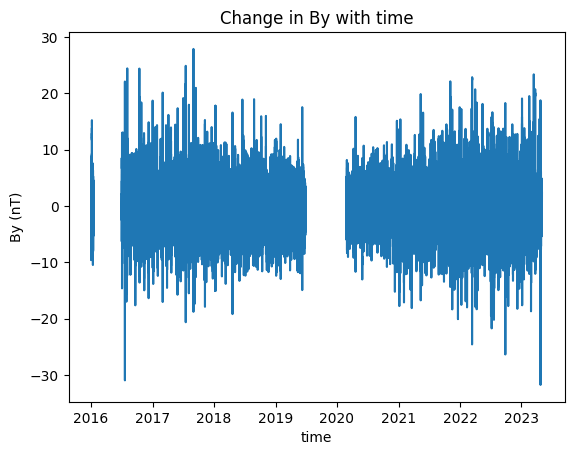

In [11]:
# Figure of By with time
date = data.iloc[:, 0]
plt.title('Change in By with time')
plt.xlabel('time')
plt.ylabel('By (nT)')
plt.plot(date, By)
plt.show()

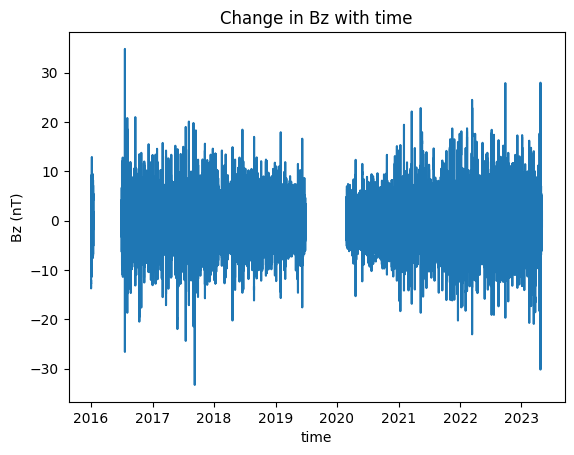

In [12]:
# Figure of Bz with time
date = data.iloc[:, 0]
plt.plot(date, Bz)
plt.title('Change in Bz with time')
plt.xlabel('time')
plt.ylabel('Bz (nT)')
plt.show()

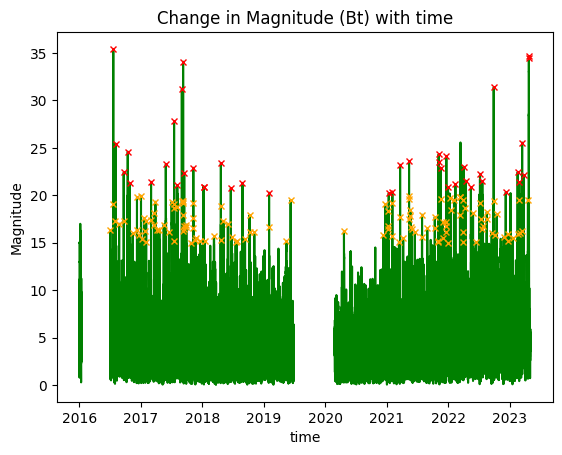

In [13]:
# Locate the Peaks above a Magnitude of 20
peaks, _ = find_peaks(data['magnitude'], height=20.01, prominence=19)
peaks1, _ = find_peaks(data['magnitude'], height=(15,20), prominence=10)
# Figure of magnitude (Bt) with time
date = data.iloc[:, 0]
plt.plot(date, data['magnitude'],color='g')
plt.plot(date[peaks], data['magnitude'][peaks], "x", color='r', markersize=5)
plt.plot(date[peaks1], data['magnitude'][peaks1], "x", color='orange', markersize=5)
plt.title('Change in Magnitude (Bt) with time')
plt.xlabel('time')
plt.ylabel('Magnitude')
plt.show()

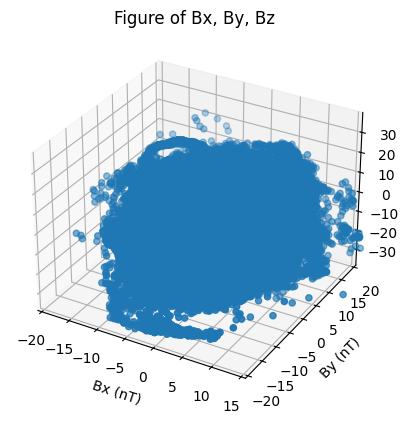

In [14]:
# Figure of Bx, By, Bz
# Matplotlib does not accomodate for third axes (z) but just note that the third axes is for 'Bz'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlim(-20, 15)
plt.ylim(-20, 20)
plt.title('Figure of Bx, By, Bz')
plt.xlabel('Bx (nT)')
plt.ylabel('By (nT)')
ax.scatter(Bx, By, Bz)
plt.show()

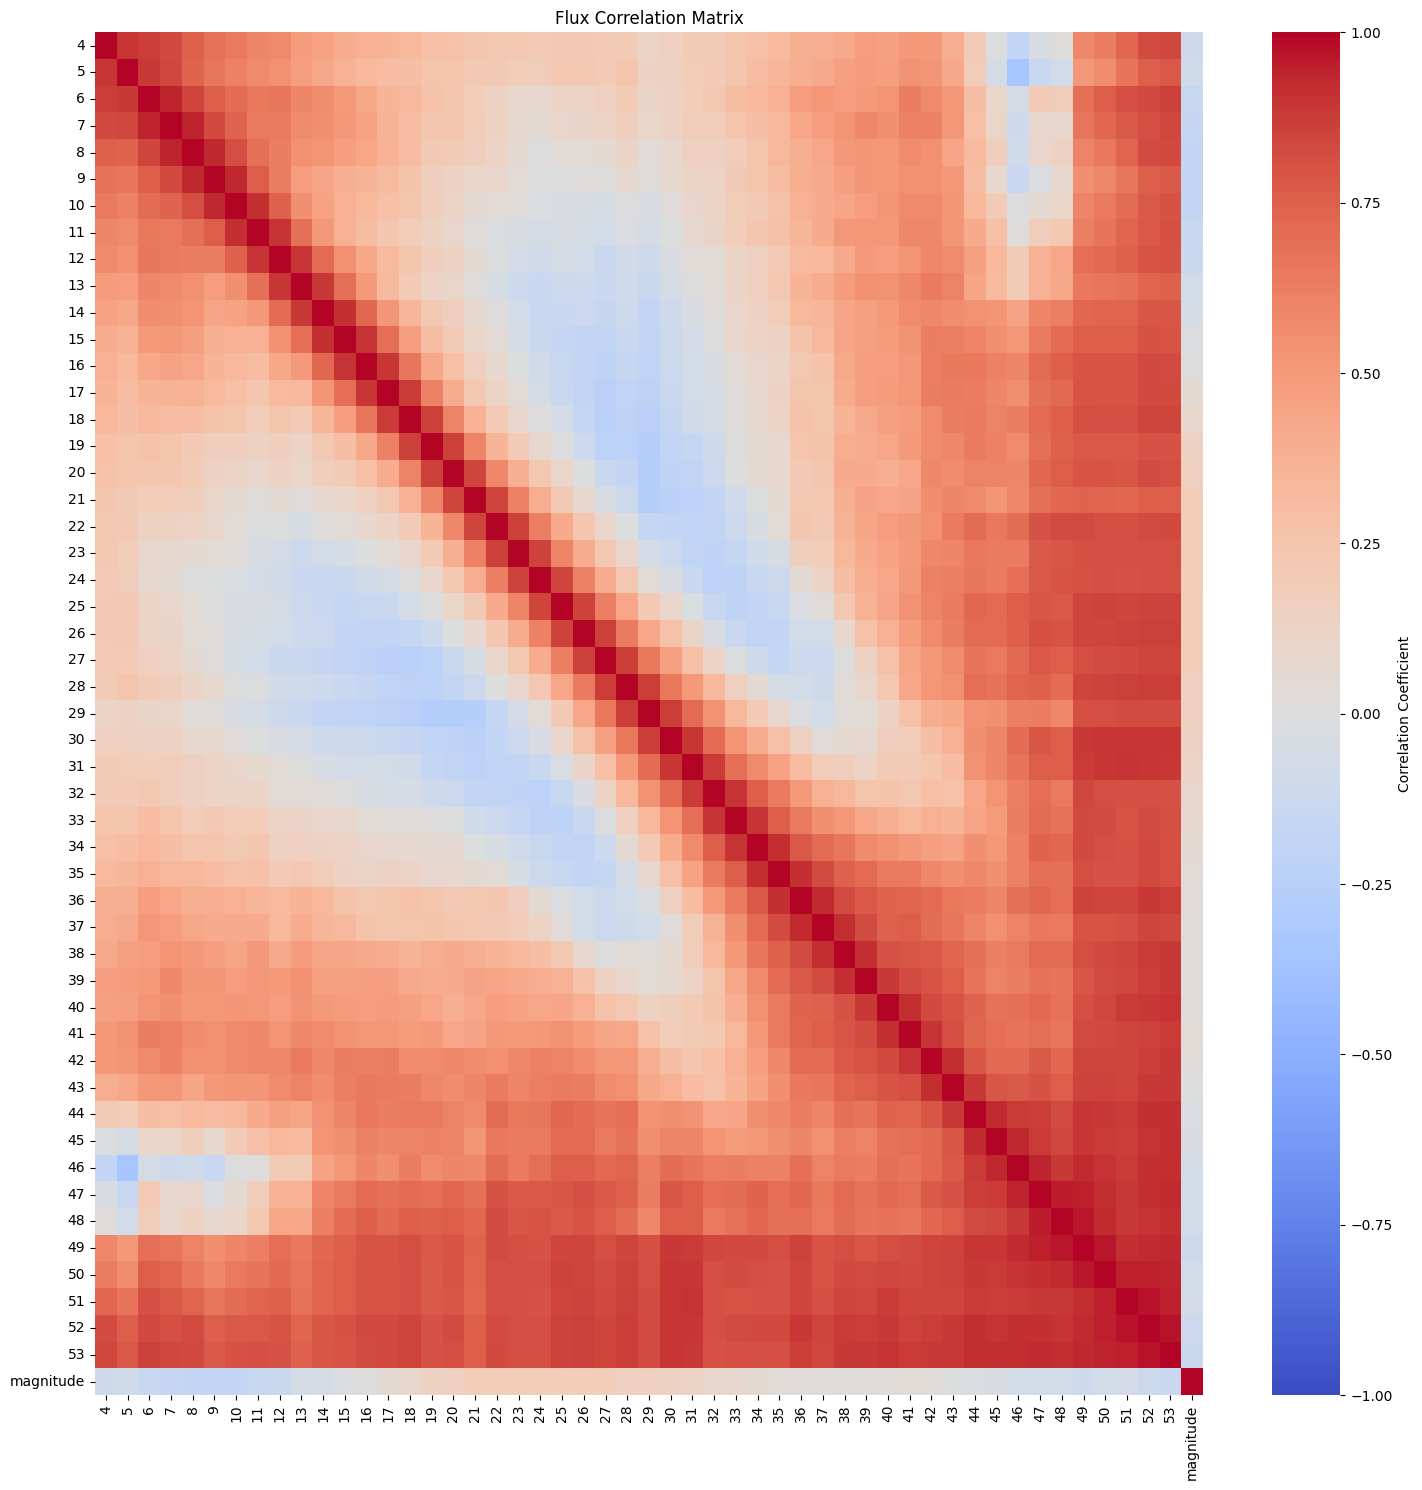

In [15]:
# Drop the 'Time', 'Bx', 'By', and 'Bz' columns to focus on the flux columns
flux_df = data.drop(columns=[0,1,2,3])

# Calculate the correlation matrix
corr_matrix = flux_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Flux Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Descriptive statistics for the flux data
print(flux_df.describe())


                  4             5             6             7             8  \
count  1.519804e+06  1.582311e+06  1.721032e+06  1.809991e+06  1.922099e+06   
mean   6.904954e+01  2.405151e+01  9.262740e+01  9.369958e+01  1.246801e+02   
std    6.505515e+01  4.948382e+01  7.784311e+01  8.532521e+01  1.040021e+02   
min    2.317260e-01  2.317260e-01  2.317260e-01  2.317260e-01  2.317260e-01   
25%    3.139748e+01  2.317260e-01  4.230860e+01  3.983035e+01  5.333525e+01   
50%    5.893845e+01  1.063320e+01  8.518255e+01  8.183820e+01  1.085690e+02   
75%    9.426612e+01  3.352490e+01  1.191900e+02  1.199030e+02  1.635685e+02   
max    1.675760e+03  1.582720e+03  1.736050e+03  1.496590e+03  1.699290e+03   

                  9            10            11            12            13  \
count  2.008476e+06  2.128636e+06  2.224303e+06  2.355847e+06  2.423554e+06   
mean   1.251655e+02  1.683491e+02  1.801567e+02  2.738568e+02  2.399177e+02   
std    1.253738e+02  1.497272e+02  1.710773e+02  1.

In [17]:
# Drop the 'Bx', 'By', and 'Bz' columns to focus on the flux columns
flux_data = data.drop(columns=[1,2,3])

# Set 'Time' as the index for the heatmap
flux_data.set_index(flux_data.columns[0], inplace=True)

#Compute descriptive statistics
stats = flux_data.describe()

# Transpose the result to have the flux types as rows
stats_T = stats.transpose()

# Select specific rows
specific_rows = stats_T.loc[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,41,42,43,44,45,46,47,48,49,50,51,52,53]]
specific_rows

,count,mean,std,min,25%,50%,75%,max
4,1519804.0,69.049537,65.055148,0.231726,31.397475,58.93845,94.266125,1675.76
5,1582311.0,24.051507,49.483821,0.231726,0.231726,10.63320,33.524900,1582.72
6,1721032.0,92.627397,77.843112,0.231726,42.308600,85.18255,119.190000,1736.05
7,1809991.0,93.699583,85.325215,0.231726,39.830350,81.83820,119.903000,1496.59
8,1922099.0,124.680143,104.002063,0.231726,53.335250,108.56900,163.568500,1699.29
9,2008476.0,125.165458,125.373841,0.231726,44.498675,100.68450,154.699000,1848.46
10,2128636.0,168.349146,149.727165,0.231726,69.753550,135.69200,217.045000,2270.62
11,2224303.0,180.156711,171.077344,0.231726,67.767050,138.49800,233.728000,2948.61
12,2355847.0,273.856754,164.971869,0.231726,161.915000,254.23900,342.502000,2449.86
13,2423554.0,239.917687,190.670930,0.231726,121.415250,197.71200,309.965000,2300.98


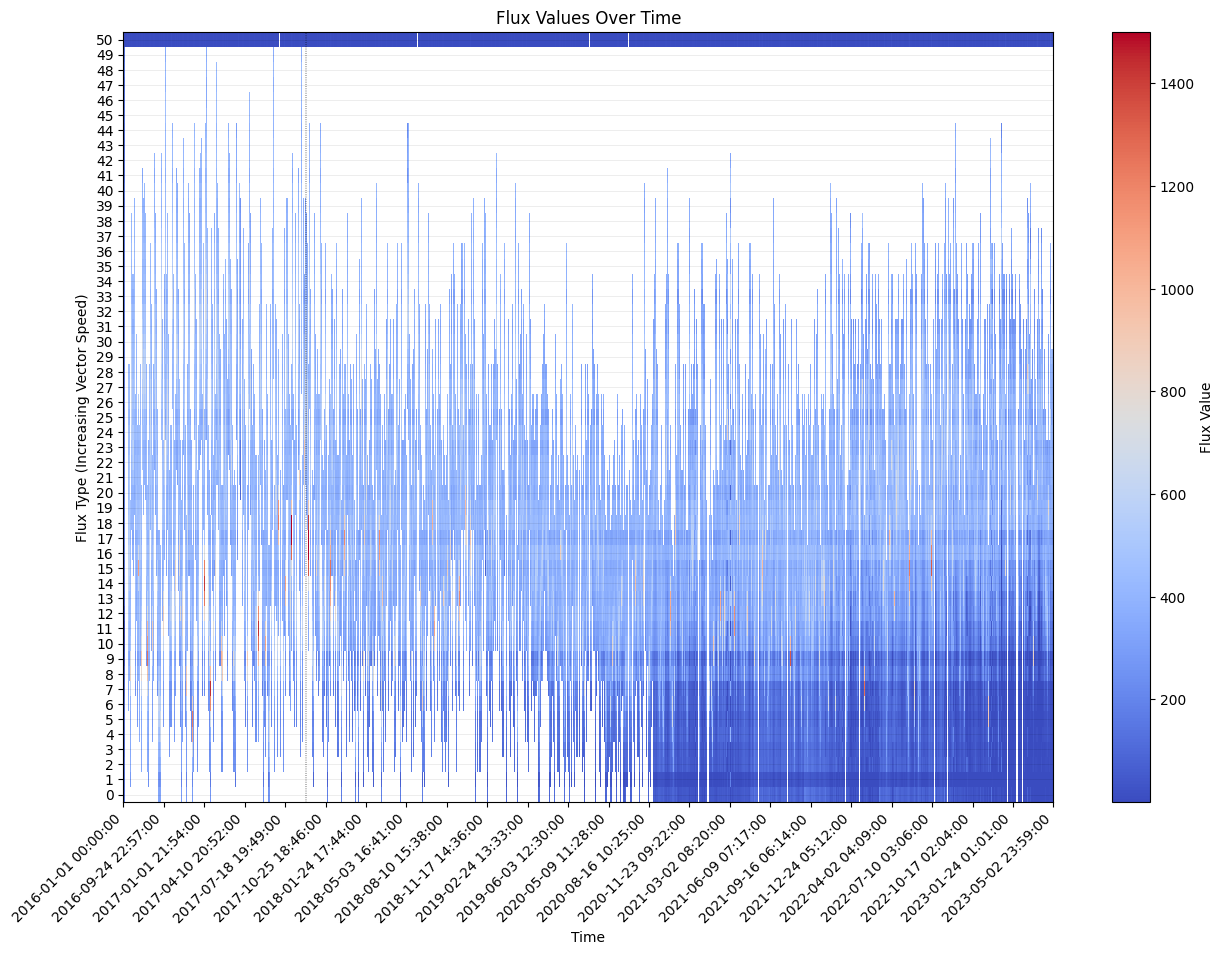

In [18]:
# Normalize the data using Min-Max scaling
#normalized_flux_data = (flux_data - flux_data.min()) / (flux_data.max() - flux_data.min())

# Define color normalization boundaries based on data percentiles
vmin = flux_data.min().min()  # Global minimum value
vmax = 1500 # Global Maximum value

# Plot the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(flux_data.iloc[:, :].T, cmap='coolwarm', aspect='auto', vmin=vmin, vmax=vmax)

#########################

# # Set the x-axis limits (COMMENT this block if the entire year is desired)
# start_date = '2017-09-06' # Pre Solar flare event
# end_date = '2017-09-10' # Post Solar flare and the proceding geo-magnetic storm even has ended
# start_pos = flux_data.index.get_loc(pd.Timestamp(start_date))
# end_pos = flux_data.index.get_loc(pd.Timestamp(end_date))
# ax.set_xlim(start_pos, end_pos)

# # Set x-axis labels based on the specified range
# ax.xaxis.set_ticks_position('bottom')
# num_ticks = 24  # Number of time labels to display
# positions = np.linspace(start_pos, end_pos, num_ticks).astype(int)  # Evenly spaced tick positions within the specified range
# ax.set_xticks(positions)
# ax.set_xticklabels(flux_data.index[positions], rotation=45, ha="right")

#########################

### THIS PART REPLACES THE COMMENTED CODE ABOVE WHICH GIVES THE X AXIS A SPECIFIC START AND END DATE

# Set x-axis labels based on the entire data range
ax.xaxis.set_ticks_position('bottom')
num_ticks = 24  # Number of time labels to display

# Since you want the entire range, start_pos would be the first index and end_pos would be the last
start_pos = 0
end_pos = len(flux_data) - 1

positions = np.linspace(start_pos, end_pos, num_ticks).astype(int)  # Evenly spaced tick positions within the entire range
ax.set_xticks(positions)
ax.set_xticklabels(flux_data.index[positions], rotation=45, ha="right")

##########################

# Reverse the y-axis to have 0 at the bottom and higher vector speeds at the top
ax.set_ylim(ax.get_ylim()[::-1])  # Inverting the y-axis limits

# Add horizontal grid lines for each vector speed
ax.yaxis.set_ticks(np.arange(0, len(flux_data.columns), 1))
ax.grid(which='both', axis='y', linestyle='-', linewidth=0.5, color='k', alpha=0.1)

# Draw vertical grid lines for the specific dates in 2017 to check if the flux is corrolated to the 8th biggest solar flare event X9.3 2017-09-06 11:53am start time
specific_dates_2017 = ["2017-09-06 12:00:00", "2017-09-09 00:00:00"]
positions_2017 = [flux_data.index.get_loc(pd.Timestamp(date)) for date in specific_dates_2017]
for position in positions_2017:
    ax.axvline(x=position, linewidth=0.6, color='k',linestyle=':', alpha=0.4)

# Colorbar representing the actual range of flux values
colorbar = plt.colorbar(cax, label='Flux Value')

plt.title('Flux Values Over Time')
plt.xlabel('Time')
plt.ylabel('Flux Type (Increasing Vector Speed)')
plt.show()